In [2]:
import cv2
import numpy as np
import os, os.path
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# base file path to Training folder + extentions below
base='/Users/jason/Documents/research/transfer_learning/Training_data'
mutant = "/Mutant/"
wt = "/Wild-type/"
lf='/LF/'

# valid image file extension
valid_images = [".tif"]


def compile_images(basepath):
    # creates list of all the filepaths
    # at in this folder
    plis=os.listdir(basepath)
    # empty list to hold images
    imgs=[]
    # iterate over file list
    for i,f in enumerate(plis):
        # grabs filename
        ext = os.path.splitext(f)[1]
        # checks for valid extension 
        if ext.lower() not in valid_images:
            continue
        # loads image with cv2.imread(os.path.join(basepath,f))
        # converts to grayscale with cv2.cvtColor(...,cv2.COLOR_BGR2GRAY)
        # adds loaded image, along with label of file for identification
        # to the images list
        imgs.append([f.split('.tif')[0],cv2.cvtColor(cv2.imread(os.path.join(basepath,f)),cv2.COLOR_BGR2GRAY)])
    # returns a list of lists, each sublist is a label, and a grayscale numpy array of the image
    return imgs


# gather all the images for each subfolder type
m_imgs=compile_images(base+mutant)
w_imgs=compile_images(base+wt)
l_imgs=compile_images(base+lf)

# join all images into one list
a_imgs=m_imgs+w_imgs+l_imgs

In [7]:
# single image
m_imgs[0][1]

array([[233, 233, 234, ..., 232, 231, 232],
       [234, 233, 233, ..., 232, 231, 232],
       [233, 233, 233, ..., 232, 232, 233],
       ...,
       [232, 232, 232, ..., 242, 242, 242],
       [232, 232, 233, ..., 242, 242, 241],
       [232, 233, 233, ..., 241, 242, 241]], dtype=uint8)

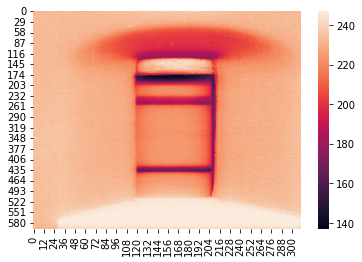

In [8]:
# single image heatmap
sns.heatmap(m_imgs[0][1])
plt.show()

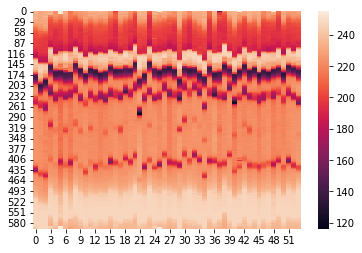

In [9]:
# creates a list of lists of the 156 column for each image
# x-axis is the the image index
# y-axis is the y-position on the image
sns.heatmap(np.array([[list(np.array(x[1])[:,156])][0] for x in m_imgs if len(x[1])==596]).T)
plt.show()

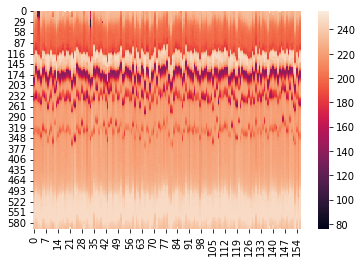

In [11]:
sns.heatmap(np.array([[list(np.array(x[1])[:,156])][0] for x in w_imgs if len(x[1])==596]).T)
plt.show()

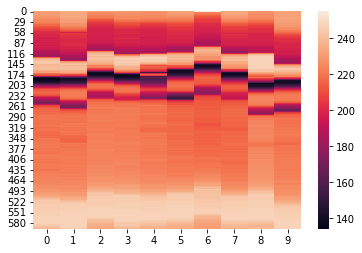

In [10]:
sns.heatmap(np.array([[list(np.array(x[1])[:,156])][0] for x in l_imgs if len(x[1])==596]).T)
plt.show()